In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dict = [{"Treatment Num": 1, "Treatment Name": "Triage", "Time Distribution":"expo", "Parameter":[7]}, 
        {"Treatment Num": 2, "Treatment Name": "Registration", "Time Distribution":"expo", "Parameter":[5.5]}, 
        {"Treatment Num": 3, "Treatment Name": "Evaluation", "Time Distribution":"normal", "Parameter":[14,6]}, 
        {"Treatment Num": 4, "Treatment Name": "Laboratory", "Time Distribution":"normal", "Parameter":[35,15]}, 
        {"Treatment Num": 5, "Treatment Name": "X-ray", "Time Distribution":"expo", "Parameter":[12]}, 
        {"Treatment Num": 6, "Treatment Name": "Consultation", "Time Distribution":"normal", "Parameter":[15,18]}, 
        {"Treatment Num": 7, "Treatment Name": "CT scan", "Time Distribution":"normal", "Parameter":[29,14]}, 
        {"Treatment Num": 8, "Treatment Name": "Discharge", "Time Distribution":"constant", "Parameter":[30]}, 
        {"Treatment Num": 9, "Treatment Name": "Admission", "Time Distribution":"expo", "Parameter":[3]}]

df = pd.DataFrame(dict)
df

,Treatment Num,Treatment Name,Time Distribution,Parameter
0,1,Triage,expo,[7]
1,2,Registration,expo,[5.5]
2,3,Evaluation,normal,"[14, 6]"
3,4,Laboratory,normal,"[35, 15]"
4,5,X-ray,expo,[12]
5,6,Consultation,normal,"[15, 18]"
6,7,CT scan,normal,"[29, 14]"
7,8,Discharge,constant,[30]
8,9,Admission,expo,[3]


In [38]:
def generate_expo(rate):
    random = np.random.exponential(1 / rate)
    return random

def generate_gaussian(mean, std_dev):
    return np.random.normal(mean, std_dev)

def generate_treatment_time(distribution, parameter):

    if distribution == "expo":
        rate = parameter[0]
        while True: #time can't be negative
            random = generate_expo(rate=rate)
            if random > 0:
                return random
    elif distribution == "normal":
        mean = parameter[0]
        std_dev = parameter[1]
        while True: #time can't be negative
            random = generate_gaussian(mean=mean, std_dev=std_dev)
            if random > 0:
                return random
    elif distribution == "constant":
        const = parameter[0]
        return const

Treatment 1: Triage, expo, [7]


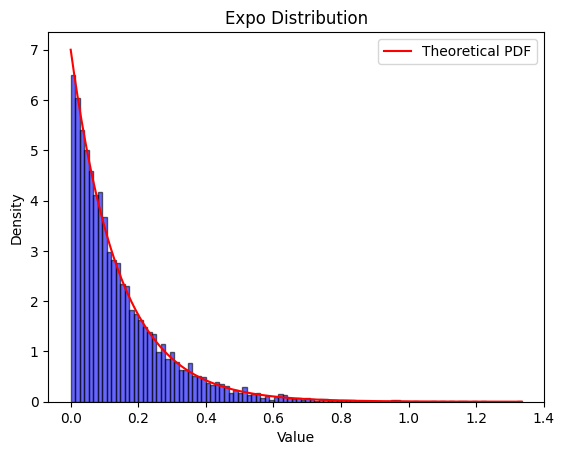

Treatment 2: Registration, expo, [5.5]


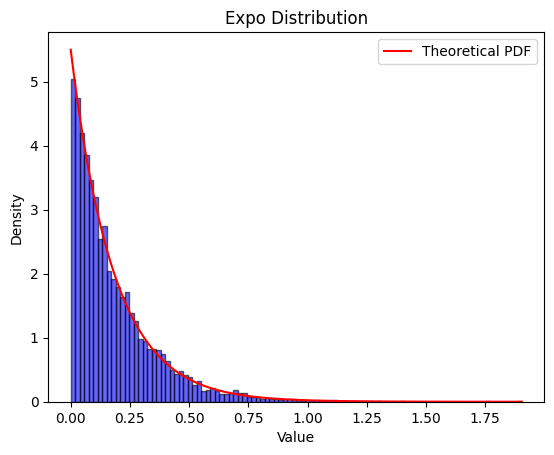

Treatment 3: Evaluation, normal, [14, 6]


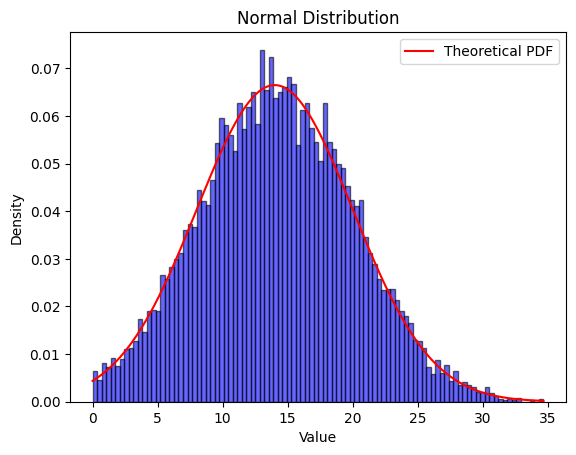

Treatment 4: Laboratory, normal, [35, 15]


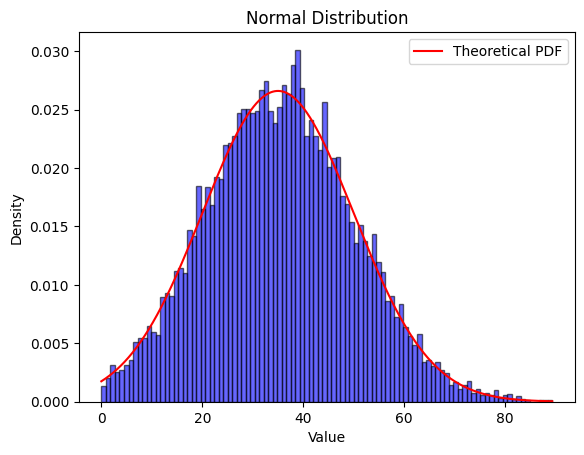

Treatment 5: X-ray, expo, [12]


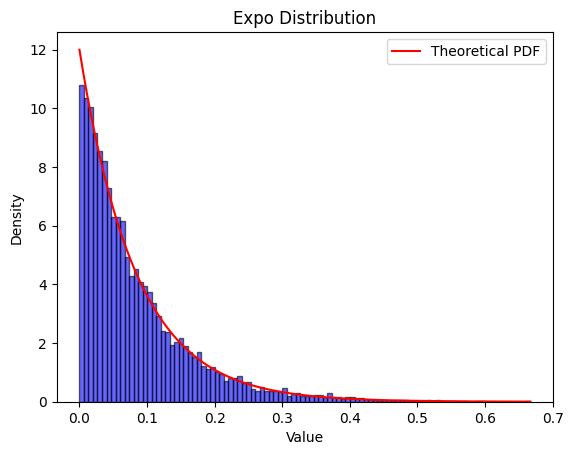

Treatment 6: Consultation, normal, [15, 18]


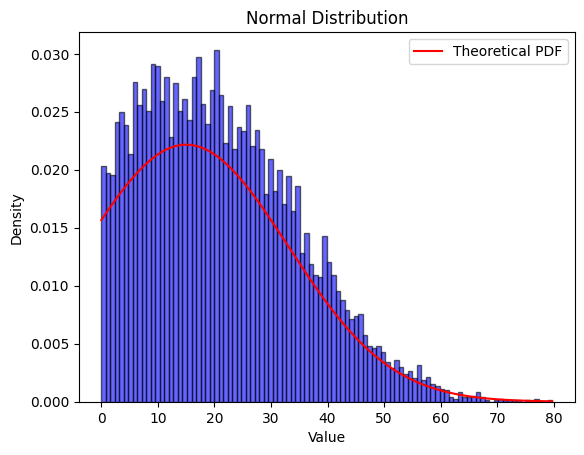

Treatment 7: CT scan, normal, [29, 14]


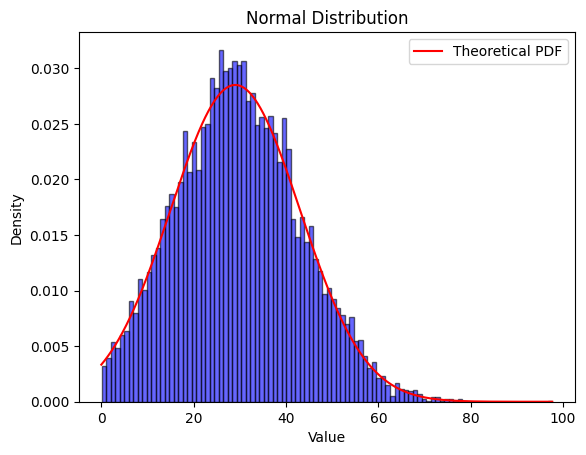

Treatment 8: Discharge, constant, [30]


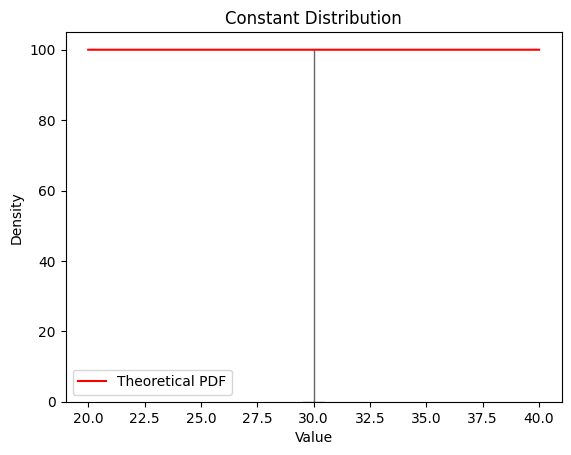

Treatment 9: Admission, expo, [3]


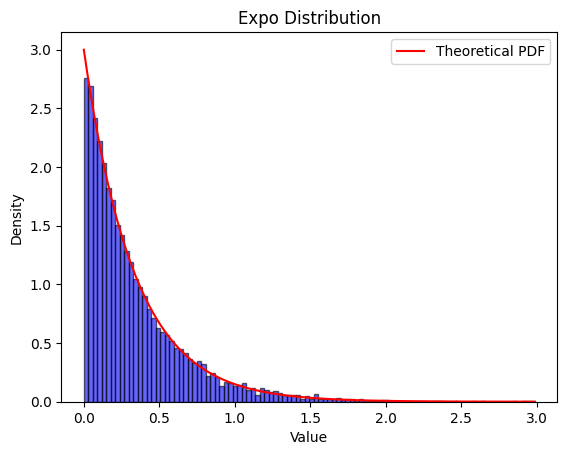

In [36]:
# Function to plot the distribution
def plot_distribution(distribution, parameter, bins=100, iteration=10000):
    # Generate the data using the generate_treatment_time function
    data = [generate_treatment_time(distribution=distribution, parameter=parameter) for _ in range(iteration)]

    # Plot the histogram for the empirical data
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='b', edgecolor='black')

    # Generate and plot the theoretical density function for comparison
    if distribution == 'expo':
        x = np.linspace(0, max(data), iteration)  # x-values for plotting the theoretical PDF
        rate = parameter[0]  # Rate parameter for exponential distribution
        y = rate * np.exp(-rate * x)  # Exponential PDF formula
    elif distribution == "normal":
        x = np.linspace(0, max(data), iteration)  # x-values for plotting the theoretical PDF
        mean = parameter[0]  # Mean of the normal distribution
        std_dev = parameter[1]  # Standard deviation of the normal distribution
        y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)  # Normal PDF formula
    elif distribution == "constant":
        const = parameter[0]  # Constant distribution
        x = np.linspace(const-10, const+10, iteration)  # x-values for plotting the theoretical PDF
        y = np.ones_like(x)*(iteration/bins)

    # Plot the theoretical PDF
    plt.plot(x, y, 'r-', label='Theoretical PDF')

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'{distribution.capitalize()} Distribution')
    plt.legend()
    plt.show()

# Function to test distributions using the given DataFrame
def test_distribution(df):
    for index, row in df.iterrows():
        treatment_num = row["Treatment Num"]
        treatment_name = row["Treatment Name"]
        time_distribution = row["Time Distribution"]
        parameter = row["Parameter"]

        # Print treatment information (optional)
        print(f"Treatment {treatment_num}: {treatment_name}, {time_distribution}, {parameter}")
        
        # Plot the distribution for each treatment
        plot_distribution(distribution=time_distribution, parameter=parameter)

test_distribution(df)